In [88]:
#coding: utf-8

import warnings
warnings.simplefilter("ignore")

import os
import sys 
import wave
import time
import librosa
import numpy as np
import seaborn as sns
from utils import *
import matplotlib.pyplot as plt
from StringIO import StringIO
import pandas as pd
import collections
from sklearn.metrics import accuracy_score

%pylab inline

# sudo pip install librosa
# ubuntu: sudo apt-get install libav-tools
# OSX   : brew install libav OMP_NUM_THREADS=2

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Get the Data

Датасет для контеста помещен вот здесь: https://yadi.sk/d/3jmeVCfSwTKgm (внимание! файл весит 3,5 Гб)


Он распаковывается в папку "musicdata". Все пути в этом ноутбуке будут относительно этой папки: "./musicdata/\*". 

Вы можете изменить базовый путь, как вам удобно.

In [1]:
!wget "https://s31h.storage.yandex.net/rdisk/9dbd0d5aa242a0f68c3f407483308115fefd9d319de006758d7f1d742e878a03/58080644/yMOILvwUQRQmX_gy9wRrt4xY325hpMBgBUt4mljIj-lL855134MRqs435rEZGxdbZ422iAZPKFAtbDudrN2hkA==?uid=0&filename=musicdata.zip&disposition=attachment&hash=ZtU5OB5/xxlTo52rmljdoNvRP4c8yetA0CltSqFsWOk%3D&limit=0&content_type=application%2Fx-zip-compressed&fsize=4065161358&hid=7ca9dbf910adbf3e058f5268436382af&media_type=compressed&tknv=v2&rtoken=qClEFFR0xpzW&force_default=no&ycrid=na-8f51c7aa7857b0f18c729299ec9033df-downloader6h&ts=53f40719b1900&s=b7ebedd988f6f129544db6562b861044e6ddd37b8c32f769a8d2913a078227dc&bp=/24/5/data-0.4:19091029535:4065161358"

wget: /root/miniconda/envs/rep_py2/lib/libcrypto.so.1.0.0: no version information available (required by wget)
wget: /root/miniconda/envs/rep_py2/lib/libssl.so.1.0.0: no version information available (required by wget)
The name is too long, 553 chars total.
Trying to shorten...
New name is yMOILvwUQRQmX_gy9wRrt4xY325hpMBgBUt4mljIj-lL855134MRqs435rEZGxdbZ422iAZPKFAtbDudrN2hkA==?uid=0&filename=musicdata.zip&disposition=attachment&hash=ZtU5OB5%2FxxlTo52rmljdoNvRP4c8yetA0CltSqFsWOk%3D&limit=0&content_type=application%2Fx-zip-.
The name is too long, 553 chars total.
Trying to shorten...
New name is yMOILvwUQRQmX_gy9wRrt4xY325hpMBgBUt4mljIj-lL855134MRqs435rEZGxdbZ422iAZPKFAtbDudrN2hkA==?uid=0&filename=musicdata.zip&disposition=attachment&hash=ZtU5OB5%2FxxlTo52rmljdoNvRP4c8yetA0CltSqFsWOk%3D&limit=0&content_type=application%2Fx-zip-.
--2016-10-19 20:28:56--  https://s31h.storage.yandex.net/rdisk/9dbd0d5aa242a0f68c3f407483308115fefd9d319de006758d7f1d742e878a03/58080644/yMOILvwUQRQmX_gy9wRrt4xY

In [9]:
!unzip "musicdata.zip"

Archive:  musicdata.zip
   creating: audiosamples/
  inflating: audiosamples/short_206024.wav  
  inflating: audiosamples/short_206377.wav  
  inflating: audiosamples/short_206447.wav  
  inflating: audiosamples/short_206626.wav  
  inflating: audiosamples/short_206771.wav  
  inflating: audiosamples/short_206941.wav  
   creating: spectrograms/
  inflating: spectrograms/spectrograms1.pcl  
  inflating: spectrograms/spectrograms2.pcl  
  inflating: spectrograms/spectrograms3.pcl  
  inflating: spectrograms/spectrograms4.pcl  
  inflating: spectrograms/spectrograms5.pcl  
  inflating: spectrograms/spectrograms6.pcl  
  inflating: spectrograms/spectrograms7.pcl  
  inflating: train_genres.txt        


In [3]:
BP = "./"

# Just a Sound

Для начала попробуем поработать со звуком - послушайте любой трек, постройте график сырых данных и спектрограмму.

In [3]:
import IPython
from IPython.display import HTML

def Audio(url):
    return HTML("<center><audio controls><source src='{}' type=\"audio/wav\"></audio>".format(url))

In [4]:
sound_file = os.path.join(BP, "audiosamples", "short_206377.wav")
y, sr = librosa.load(sound_file)

Audio(url=sound_file)

# Sound as 1D-Signal

In [23]:
len(y) / sr

10

In [24]:
from scipy.io import wavfile as wav
rate, data = wav.read(sound_file)

In [25]:
len(data)/rate

10

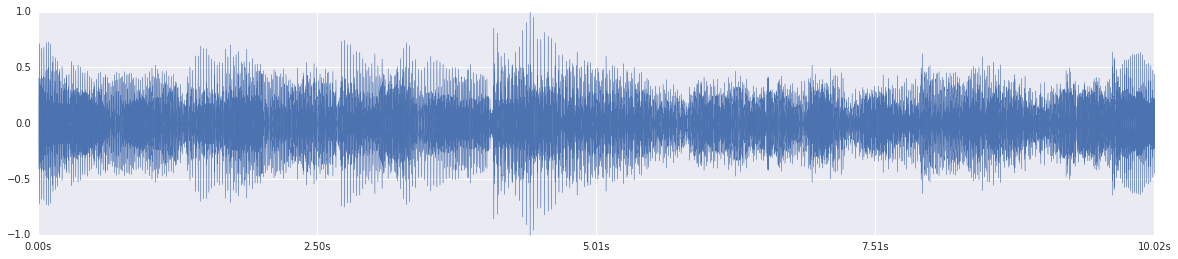

In [26]:
plt.figure(figsize=(20,4))
librosa.display.waveplot(y, sr=sr)

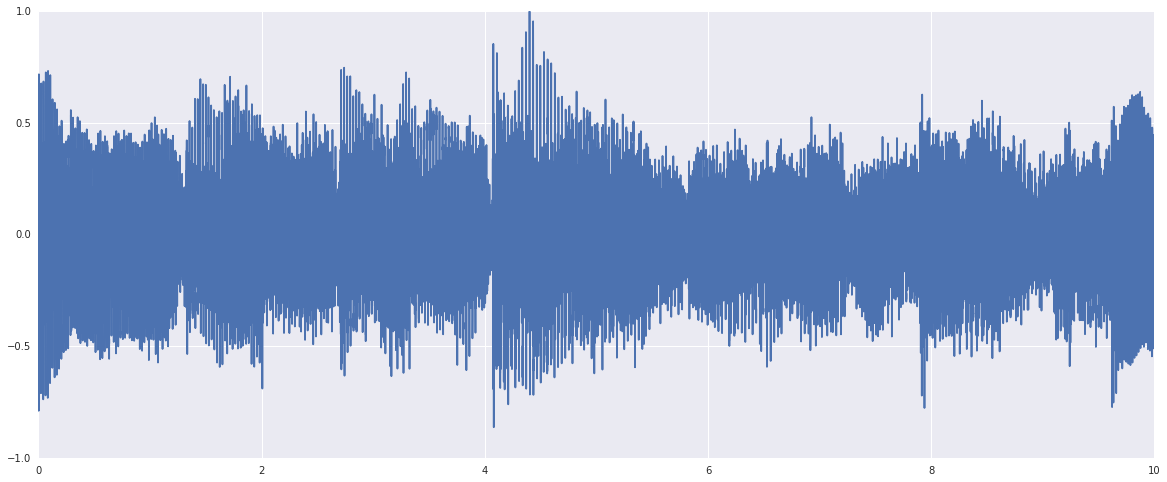

In [29]:
plt.figure(figsize=(20,8))
# 
# Используйте pylab.plot для построения графика, нарисуйте y, sr
#
x = np.arange(0, 10, 1./sr)
pylab.plot(x, y)
pylab.xlim([0, 10])
pylab.show()

# Sound as 2D-Signal

Нашу цель слелать из предыдущего графика картинку - для этого нам нужно оценить частоты в каждый момент времени. Благо за нас это умеет делать librosa, у которой внутри STFFT. Используйте librosa.feature.melspectrogram -- для получения спектрограммы, и librosa.logamplitude для выравнивания диапазонов частот. 

help: https://gist.github.com/mailletf/3484932dd29d62b36092

In [30]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
log_S = librosa.logamplitude(S, ref_power=np.max)

In [31]:
y.shape

(220500,)

In [ ]:
220500. / 128

Нарисуйте спектрограмму, получилась красивая картинка?

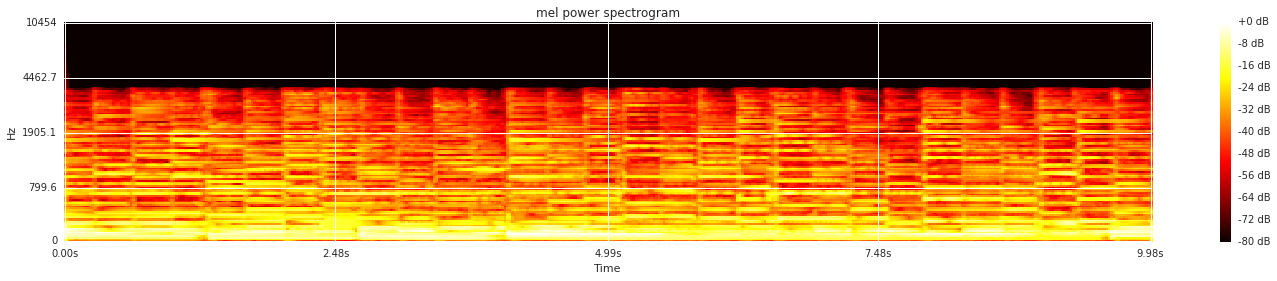

In [32]:
plt.figure(figsize=(20,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel', cmap='hot')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

# Prepare the Data

В этой секции мы создадим датасет, прочитав все данные.

In [60]:
import numpy as np
data = []
for i in xrange(1, 7):
    data.append(np.load(os.path.join(BP, "spectrograms", "spectrograms" + str(i) + ".pcl")))
data = np.concatenate(data)

Здесь вы должны получить train genres. Они идут подряд в соответствии с последовательностью треков в файлах с данными. Для содержимого первых шести файлов у вас есть жанры, а для последнего файла, вам их нужно предсказать.

In [61]:
train_genres = []
with open(os.path.join(BP, "train_genres.txt"), "rt") as f_in:
    for line in f_in.readlines():
        train_genres.append(line.split("\n")[0])
print len(train_genres)

12000


In [62]:
def lables_to_num(train_genres):
    classes = list(set(train_genres))
    num_classes = len(classes)
    d = {classes[i]: i for i in range(num_classes)}
    genres = {i: classes[i] for i in range(num_classes)}
    y = np.array([int(d[x]) for x in train_genres])
    return num_classes, d, genres, y

In [147]:
def get_drop_list(train_genres):
    a = set(train_genres)
    b = [0] * 67
    for i in train_genres:
        b[d[i]] += 1
    c = {classes[i]: b[i] for i in xrange(len(classes))}
    od = collections.OrderedDict(sorted(c.items()))
#     drop_list = ['other', 'soundtrack', 'jazz', 'estrada', 'newage']
    drop_list = ['other']
    for k, v in od.iteritems(): 
        if v <= 15:
            drop_list.append(k)
    return drop_list

In [148]:
cut_train_genres = []
X_cutted = []
drop_list = get_drop_list(train_genres)
for i in xrange(len(train_genres)):
    if not train_genres[i] in drop_list:
        X_cutted.append(data[i])
        cut_train_genres.append(train_genres[i])
cut_train_genres = np.array(cut_train_genres)
X_cutted = np.array(X_cutted)

In [149]:
X_cutted.shape

(11669, 128, 431)

In [163]:
def reduce_genre(genre, max_num=1000):
    cnt = 0
    new_X = []
    new_y = []
    for i in range(len(data)):
        if train_genres[i] == genre:
            cnt += 1
            if cnt >= max_num:
                continue
        new_X.append(data[i])
        new_y.append(train_genres[i])
    return np.array(new_X), np.array(new_y)


In [164]:
X_cutted, cut_train_genres = reduce_genre('pop')
X_cutted, cut_train_genres = reduce_genre('rock')
print X_cutted.shape
X = X_cutted
num_classes, d, genres, y = lables_to_num(cut_train_genres)

(11801, 128, 431)


In [68]:
dict_genres = {'pop': ['pop', 'disco', 'children', 'rnb', 'dance'],
              'rock': ['rock', 'rusrock', 'ukrrock'],
              'alt': ['alternative', 'punk', 'metal'],
              'electro': ['electronics', 'techno', 'house', 'trance'],
              'relax': ['relax', 'holiday', 'country', 'eastern', 'indie', 'bard', 'blues', 'lounge'],
              'folk': ['folk', 'rusfolk', 'eurofolk', 'latinfolk'],
              'old': ['soul', 'shanson'],
              'reggae': ['reggae'],
              'rap': ['rap', 'rusrap'],
              'classical': ['classical']
             }

In [70]:
def to_comm_genres(X_cutted):
    comm_genres = []
    for i in range(len(X_cutted)):
        for k, v in dict_genres.iteritems():
            if cut_train_genres[i] in v:
                comm_genres.append(k)
    return np.array(X_cutted)

X = to_comm_genres(X_cutted)
num_comm_classes, d_comm, genres_comm, y = lables_to_num(comm_genres)

In [165]:
perm = np.random.permutation(y.shape[0])
y = y[perm]
X = X[perm]
size = X.shape[0] * 0.8
X_train, X_valid = X[:size], X[size:]
y_train, y_valid = y[:size], y[size:]

# Nearest Neighbors genre classification

Перемешаем датасет - используйте `np.random.permutation` и индексацию `a[np.random.permutation]`.

In [56]:
perm = np.random.permutation(y.shape[0])
y = y[perm]
X = X[perm]

Разобьем датасет на трейн и валидацию 80/20%.

In [287]:
Xreshape = X.reshape(X.shape[0], X.shape[1] * X.shape[2])
X_train, X_valid = Xreshape[:10000], Xreshape[10000:]
y_train, y_valid = y[:10000], y[10000:]

Попробуем поклассифицировать жанры методом ближайших соседей.

In [289]:
from sklearn.neighbors import KNeighborsClassifier
os.environ['JOBLIB_TEMP_FOLDER'] = '/notebooks/tmp'

clf = KNeighborsClassifier(n_jobs=4, metric='cosine', n_neighbors=300, algorithm='brute')
clf = clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_valid.reshape((X_valid.shape[0], -1)))

print accuracy_score(y_valid, y_val_pred)

0.3505


# Fully-Connected Neural Nets

Использовать нейросети - это хорошая идея, давайте начнем с полносвязных сетей.

In [9]:
import theano
import lasagne
import theano.tensor as T

from utils import train_net

Перемешаем и разобьем датасет.

In [161]:
perm = np.random.permutation(y.shape[0])
X, y = np.array(X)[perm].astype('float32'), np.array(y)[perm]
Xreshape = X.reshape(X.shape[0], 1, X.shape[1], X.shape[2])

X_train, X_valid = Xreshape[:10000], Xreshape[10000:]
y_train, y_valid = y[:10000], y[10000:]

In [162]:
input_X, target_y = T.tensor4("X", dtype='float32'), T.vector("y", dtype='int32')
nn = lasagne.layers.InputLayer(shape=(None, 1, X.shape[1], X.shape[2]), input_var=input_X) 
#
# Используйте 2-3 больших полносвязных слоя, обучилась ли сеть? если нет то почему?
#

nn0 = lasagne.layers.DenseLayer(nn,100, name='conv0')
nn1 = lasagne.layers.DenseLayer(nn0,num_classes, name='conv2')
nn2 = lasagne.layers.DenseLayer(nn1, num_classes, nonlinearity=lasagne.nonlinearities.softmax)

y_predicted = lasagne.layers.get_output(nn2)
all_weights = lasagne.layers.get_all_params(nn2)

loss = lasagne.objectives.categorical_crossentropy(y_predicted, target_y).mean()
accuracy = lasagne.objectives.categorical_accuracy(y_predicted, target_y).mean()
updates_sgd = lasagne.updates.sgd(loss, all_weights, 0.001)

In [163]:
train_fun = theano.function([input_X, target_y], [loss, accuracy], allow_input_downcast=True, updates=updates_sgd)
test_fun  = theano.function([input_X, target_y], [loss, accuracy], allow_input_downcast=True)

In [164]:
%time conv_nn = train_net(nn, train_fun, test_fun, X_train, y_train, X_valid, y_valid, num_epochs=10, batch_size=50)

Epoch   1 of  10 train_loss = 2199.23 val_loss = 3.99 train_acc = 34.69 val_acc = 34.40
Epoch   2 of  10 train_loss = 3.90 val_loss = 3.97 train_acc = 35.16 val_acc = 34.40
Epoch   3 of  10 train_loss = 3.89 val_loss = 3.97 train_acc = 35.16 val_acc = 34.40
Epoch   4 of  10 train_loss = 3.88 val_loss = 3.95 train_acc = 35.16 val_acc = 34.40
Epoch   5 of  10 train_loss = 3.87 val_loss = 3.93 train_acc = 35.16 val_acc = 34.40
Epoch   6 of  10 train_loss = 3.86 val_loss = 3.92 train_acc = 35.16 val_acc = 34.40
Epoch   7 of  10 train_loss = 3.84 val_loss = 3.91 train_acc = 35.16 val_acc = 34.40
Epoch   8 of  10 train_loss = 3.83 val_loss = 3.90 train_acc = 35.16 val_acc = 34.40
Epoch   9 of  10 train_loss = 3.82 val_loss = 3.89 train_acc = 35.16 val_acc = 34.40
Epoch  10 of  10 train_loss = 3.81 val_loss = 3.87 train_acc = 35.16 val_acc = 34.40
CPU times: user 14min 51s, sys: 57min 11s, total: 1h 12min 2s
Wall time: 5min 3s


# Convolution Neural Nets

Да, вероятно, полносвязные сети не зажгли и kNN не обогнали. Давайте попробуем сверточные, хороший вариант делать одномерные свертки (сразу по всем частотам). Хотя двумерные тоже могут работать. 

Архитектуру можно подсмотреть [тут](http://benanne.github.io/2014/08/05/spotify-cnns.html).

In [7]:
import theano
import lasagne
import theano.tensor as T

from utils import train_net

In [238]:
perm = np.random.permutation(len(y))
X, y = np.array(X)[perm].astype('float32'), np.array(y)[perm]
Xreshape = X.reshape(X.shape[0], 1, X.shape[1], X.shape[2])

X_train, X_valid = Xreshape[:10000], Xreshape[10000:]
y_train, y_valid = y[:10000], y[10000:]

In [57]:
X_train, X_valid = X[:10000], X[10000:]
y_train, y_valid = y[:10000], y[10000:]

###  CNN

In [272]:
from lasagne.layers import Conv2DLayer, Conv1DLayer, MaxPool1DLayer, MaxPool2DLayer, BatchNormLayer, DenseLayer
from lasagne.nonlinearities import rectify, softmax, sigmoid, tanh


input_X, target_y = T.tensor4("X", dtype='float64'), T.vector("y", dtype='int32')
network = lasagne.layers.InputLayer(shape=(None, 1, X.shape[1], X.shape[2]), input_var=input_X) 

# Сделайте свою сеть, используя: Conv1DLayer + MaxPool1DLayer + DenseLayer
    
network = Conv2DLayer(network,16,filter_size=(1, 1),stride=(1), nonlinearity=rectify, name="conv1")
network = MaxPool2DLayer(network, pool_size=(3, 3), stride=2, pad=2, name="pool1")
network = BatchNormLayer(network, name="bn1")

network = Conv2DLayer(incoming=network, num_filters=32, filter_size=(5, 5), stride=1, nonlinearity=rectify, name="conv2")
network = MaxPool2DLayer(incoming=network, pool_size=(3, 3), stride=2, pad=2, name="pool2")
network = BatchNormLayer(incoming=network, name="bn2")

network = Conv2DLayer(incoming=network, num_filters=64, filter_size=(3, 3), stride=1, nonlinearity=rectify, name="conv3")
network = MaxPool2DLayer(incoming=network, pool_size=(3, 3), stride=2, pad=2, name="pool3")
network = BatchNormLayer(incoming=network, name="bn3")

network = Conv2DLayer(incoming=network, num_filters=64, filter_size=(3, 3), stride=1, nonlinearity=rectify, name="conv4")
network = MaxPool2DLayer(incoming=network, pool_size=(3, 3), stride=2, pad=2, name="pool4")
network = BatchNormLayer(incoming=network, name="bn4")

network = Conv2DLayer(incoming=network, num_filters=64, filter_size=(3, 3), stride=1, nonlinearity=rectify, name="conv5")
network = MaxPool2DLayer(incoming=network, pool_size=(3, 3), stride=2, pad=2, name="pool5")
network = BatchNormLayer(incoming=network, name="bn5")

network = DenseLayer(incoming=network, num_units=1024, nonlinearity=rectify, name="dense1")
network = BatchNormLayer(incoming=network, name="bm_last")

network = DenseLayer(incoming=network, num_units=num_classes, nonlinearity=softmax)

как-то не вышло с 2D, хотя на спектрограммах это наверняка и не имеет значения

In [273]:
from lasagne.layers import Conv2DLayer, Conv1DLayer, MaxPool1DLayer, MaxPool2DLayer, BatchNormLayer, DenseLayer
from lasagne.nonlinearities import rectify, softmax, sigmoid, tanh


input_X, target_y = T.tensor3("X", dtype='float64'), T.vector("y", dtype='int32')
network = lasagne.layers.InputLayer(shape=(None, X.shape[1], X.shape[2]), input_var=input_X) 

# Сделайте свою сеть, используя: Conv1DLayer + MaxPool1DLayer + DenseLayer
    
network = Conv1DLayer(network,16,filter_size=(7),stride=(1), nonlinearity=rectify, name="conv1")
network = MaxPool1DLayer(network, pool_size=(3), stride=2, pad=2, name="pool1")
network = BatchNormLayer(network, name="bn1")

network = Conv1DLayer(incoming=network, num_filters=32, filter_size=(5), stride=1, nonlinearity=rectify, name="conv2")
network = MaxPool1DLayer(incoming=network, pool_size=(3), stride=2, pad=2, name="pool2")
network = BatchNormLayer(incoming=network, name="bn2")

network = Conv1DLayer(incoming=network, num_filters=64, filter_size=(3), stride=1, nonlinearity=rectify, name="conv3")
network = MaxPool1DLayer(incoming=network, pool_size=(3), stride=2, pad=2, name="pool3")
network = BatchNormLayer(incoming=network, name="bn3")

network = Conv1DLayer(incoming=network, num_filters=64, filter_size=(3), stride=1, nonlinearity=rectify, name="conv4")
network = MaxPool1DLayer(incoming=network, pool_size=(3), stride=2, pad=2, name="pool4")
network = BatchNormLayer(incoming=network, name="bn4")

network = Conv1DLayer(incoming=network, num_filters=64, filter_size=(3), stride=1, nonlinearity=rectify, name="conv5")
network = MaxPool1DLayer(incoming=network, pool_size=(3), stride=2, pad=2, name="pool5")
network = BatchNormLayer(incoming=network, name="bn5")

network = DenseLayer(incoming=network, num_units=1024, nonlinearity=rectify, name="dense1")
network = BatchNormLayer(incoming=network, name="bm_last")

network = DenseLayer(incoming=network, num_units=num_classes, nonlinearity=softmax)

In [274]:
y_predicted = lasagne.layers.get_output(network)
all_weights = lasagne.layers.get_all_params(network, trainable=True)

loss = lasagne.objectives.categorical_crossentropy(y_predicted, target_y).mean()
accuracy = lasagne.objectives.categorical_accuracy(y_predicted, target_y).mean()
updates_sgd = lasagne.updates.momentum(loss, all_weights, learning_rate=0.003)

In [275]:
train_fun = theano.function([input_X, target_y], [loss, accuracy], allow_input_downcast=True, updates=updates_sgd)
test_fun  = theano.function([input_X, target_y], [loss, accuracy], allow_input_downcast=True)

In [277]:
# Подумайте, какой размер батча нужен и сколько эпох вы можете себе позволить подождать
%time conv_nn = train_net(network, train_fun, test_fun, X_train, y_train, X_valid, y_valid, num_epochs=15, batch_size=50)

Epoch   1 of  15 train_loss = 3.50 val_loss = 2.79 train_acc = 24.32 val_acc = 33.90
Epoch   2 of  15 train_loss = 2.54 val_loss = 2.50 train_acc = 35.54 val_acc = 37.35
Epoch   3 of  15 train_loss = 2.28 val_loss = 2.49 train_acc = 39.19 val_acc = 37.80
Epoch   4 of  15 train_loss = 2.11 val_loss = 2.50 train_acc = 41.25 val_acc = 37.10
Epoch   5 of  15 train_loss = 1.93 val_loss = 2.47 train_acc = 45.05 val_acc = 36.05
Epoch   6 of  15 train_loss = 1.75 val_loss = 2.55 train_acc = 48.69 val_acc = 36.00
Epoch   7 of  15 train_loss = 1.60 val_loss = 2.63 train_acc = 52.08 val_acc = 36.00
Epoch   8 of  15 train_loss = 1.42 val_loss = 2.65 train_acc = 57.19 val_acc = 35.75
Epoch   9 of  15 train_loss = 1.24 val_loss = 2.80 train_acc = 61.71 val_acc = 32.40
Epoch  10 of  15 train_loss = 1.07 val_loss = 2.86 train_acc = 67.24 val_acc = 36.15
Epoch  11 of  15 train_loss = 0.91 val_loss = 2.97 train_acc = 72.41 val_acc = 33.10
Epoch  12 of  15 train_loss = 0.75 val_loss = 3.00 train_acc = 78

###  GRU

In [297]:
from lasagne.layers import BatchNormLayer, DenseLayer, GRULayer
from lasagne.nonlinearities import rectify, softmax, sigmoid, tanh


input_X, target_y = T.tensor3("X", dtype='float64'), T.vector("y", dtype='int32')
gru_net = lasagne.layers.InputLayer(shape=(None, X.shape[1], X.shape[2]), input_var=input_X) 

gru_net = GRULayer(incoming=gru_net, num_units=500)
gru_net = BatchNormLayer(incoming=gru_net)
gru_net = GRULayer(incoming=gru_net, num_units=500, only_return_final=True)
gru_net = DenseLayer(incoming=gru_net, num_units=num_classes, nonlinearity=softmax)


y_predicted = lasagne.layers.get_output(gru_net)
all_weights = lasagne.layers.get_all_params(gru_net, trainable=True)

loss = lasagne.objectives.categorical_crossentropy(y_predicted, target_y).mean()
accuracy = lasagne.objectives.categorical_accuracy(y_predicted, target_y).mean()
updates_sgd = lasagne.updates.momentum(loss, all_weights, learning_rate=0.003)


train_fun = theano.function([input_X, target_y], [loss, accuracy], allow_input_downcast=True, updates=updates_sgd)
test_fun  = theano.function([input_X, target_y], [loss, accuracy], allow_input_downcast=True)

In [ ]:
%time conv_nn = train_net(gru_net, train_fun, test_fun, X_train, y_train, X_valid, y_valid, num_epochs=20, batch_size=50)


Epoch  20 of  20 train_loss = 2.55 val_loss = 2.58 train_acc = 34.90 val_acc = 36.15
CPU times: user 21h 37min 57s, sys: 14h 9min 47s, total: 1d 11h 47min 45s
Wall time: 11h 27min 53s


### CNN + GRU

https://yerevann.github.io/2016/06/26/combining-cnn-and-rnn-for-spoken-language-identification/

In [110]:
from lasagne.layers import InputLayer, Conv2DLayer, Conv1DLayer, MaxPool1DLayer, MaxPool2DLayer, BatchNormLayer, DenseLayer, GRULayer
from lasagne.nonlinearities import rectify, softmax, sigmoid, tanh
from lasagne import layers

input_X, target_y = T.tensor3("X", dtype='float64'), T.vector("y", dtype='int32')
network = InputLayer(shape=(None, X.shape[1], X.shape[2]), input_var=input_X) 
    
network = Conv1DLayer(network,16,filter_size=(7),stride=(1), nonlinearity=rectify, name="conv1")
network = MaxPool1DLayer(network, pool_size=(3), stride=2, pad=2, name="pool1")
network = BatchNormLayer(network, name="bn1")

network = Conv1DLayer(incoming=network, num_filters=32, filter_size=(5), stride=1, nonlinearity=rectify, name="conv2")
network = MaxPool1DLayer(incoming=network, pool_size=(3), stride=2, pad=2, name="pool2")
network = BatchNormLayer(incoming=network, name="bn2")

network = Conv1DLayer(incoming=network, num_filters=32, filter_size=(3), stride=1, nonlinearity=rectify, name="conv3")
network = MaxPool1DLayer(incoming=network, pool_size=(3), stride=2, pad=2, name="pool3")
network = BatchNormLayer(incoming=network, name="bn3")

network = Conv1DLayer(incoming=network, num_filters=32, filter_size=(3), stride=1, nonlinearity=rectify, name="conv4")
network = MaxPool1DLayer(incoming=network, pool_size=(3), stride=2, pad=2, name="pool4")
network = BatchNormLayer(incoming=network, name="bn4")

all_weights = layers.get_all_params(network, trainable=True)

output = layers.get_output(network)

network = layers.InputLayer(shape=(None, 431, 27), input_var=output)

network = layers.GRULayer(incoming=network, num_units=100, only_return_final=True)
network = layers.BatchNormLayer(incoming=network)

network = layers.DenseLayer(incoming=network, num_units=num_classes, nonlinearity=softmax)

all_weights += layers.get_all_params(network, trainable=True)
y_predicted = lasagne.layers.get_output(network)

loss = lasagne.objectives.categorical_crossentropy(y_predicted, target_y).mean()
accuracy = lasagne.objectives.categorical_accuracy(y_predicted, target_y).mean()
updates_sgd = lasagne.updates.momentum(loss, all_weights, learning_rate=0.003)


train_fun = theano.function([input_X, target_y], [loss, accuracy], allow_input_downcast=True, updates=updates_sgd)
test_fun  = theano.function([input_X, target_y], [loss, accuracy], allow_input_downcast=True)

In [48]:
%time conv_gru_nn = train_net(network, train_fun, test_fun, X_train, y_train, X_valid, y_valid, num_epochs=15, batch_size=50)

Epoch   1 of  20 train_loss = 2.60 val_loss = 2.52 train_acc = 35.97 val_acc = 36.70
Epoch   2 of  20 train_loss = 2.46 val_loss = 2.46 train_acc = 36.30 val_acc = 36.75
Epoch   3 of  20 train_loss = 2.38 val_loss = 2.38 train_acc = 37.07 val_acc = 36.85
Epoch   4 of  20 train_loss = 2.32 val_loss = 2.40 train_acc = 37.71 val_acc = 37.75
Epoch   5 of  20 train_loss = 2.27 val_loss = 2.36 train_acc = 38.88 val_acc = 37.85
Epoch   6 of  20 train_loss = 2.23 val_loss = 2.34 train_acc = 39.81 val_acc = 38.25
Epoch   7 of  20 train_loss = 2.19 val_loss = 2.33 train_acc = 40.39 val_acc = 38.30
Epoch   8 of  20 train_loss = 2.16 val_loss = 2.32 train_acc = 40.54 val_acc = 39.15
Epoch   9 of  20 train_loss = 2.12 val_loss = 2.33 train_acc = 41.04 val_acc = 38.25
Epoch  10 of  20 train_loss = 2.09 val_loss = 2.31 train_acc = 42.19 val_acc = 37.85
Epoch  11 of  20 train_loss = 2.06 val_loss = 2.30 train_acc = 42.57 val_acc = 39.35
Epoch  12 of  20 train_loss = 2.03 val_loss = 2.32 train_acc = 43

In [161]:
from lasagne.layers import InputLayer, Conv2DLayer, Conv1DLayer, MaxPool1DLayer, MaxPool2DLayer, BatchNormLayer, DenseLayer, GRULayer
from lasagne.nonlinearities import rectify, softmax, sigmoid, tanh
from lasagne import layers

def train_best_network(X, y, num_classes, num_iters=10):
    size = int(0.8 * X.shape[0])
    X_train, X_valid = X[:size], X[size:]
    y_train, y_valid = y[:size], y[size:]
    print X_train.shape
    
    input_X, target_y = T.tensor3("X", dtype='float64'), T.vector("y", dtype='int32')
    network = InputLayer(shape=(None, X.shape[1], X.shape[2]), input_var=input_X) 

    network = Conv1DLayer(network,16,filter_size=(7),stride=(1), nonlinearity=rectify, name="conv1")
    network = MaxPool1DLayer(network, pool_size=(3), stride=2, pad=2, name="pool1")
    network = BatchNormLayer(network, name="bn1")

    network = Conv1DLayer(incoming=network, num_filters=32, filter_size=(5), stride=1, nonlinearity=rectify, name="conv2")
    network = MaxPool1DLayer(incoming=network, pool_size=(3), stride=2, pad=2, name="pool2")
    network = BatchNormLayer(incoming=network, name="bn2")

    network = Conv1DLayer(incoming=network, num_filters=32, filter_size=(3), stride=1, nonlinearity=rectify, name="conv3")
    network = MaxPool1DLayer(incoming=network, pool_size=(3), stride=2, pad=2, name="pool3")
    network = BatchNormLayer(incoming=network, name="bn3")

    network = Conv1DLayer(incoming=network, num_filters=32, filter_size=(3), stride=1, nonlinearity=rectify, name="conv4")
    network = MaxPool1DLayer(incoming=network, pool_size=(3), stride=2, pad=2, name="pool4")
    network = BatchNormLayer(incoming=network, name="bn4")

    all_weights = layers.get_all_params(network, trainable=True)

    output = layers.get_output(network)

    network = layers.InputLayer(shape=(None, 431, 27), input_var=output)

    network = layers.GRULayer(incoming=network, num_units=100, only_return_final=True)
    network = layers.BatchNormLayer(incoming=network)

    network = layers.DenseLayer(incoming=network, num_units=num_classes, nonlinearity=softmax)

    all_weights += layers.get_all_params(network, trainable=True)
    y_predicted = lasagne.layers.get_output(network)

    loss = lasagne.objectives.categorical_crossentropy(y_predicted, target_y).mean()
    accuracy = lasagne.objectives.categorical_accuracy(y_predicted, target_y).mean()
    updates_sgd = lasagne.updates.momentum(loss, all_weights, learning_rate=0.003)


    train_fun = theano.function([input_X, target_y], [loss, accuracy], allow_input_downcast=True, updates=updates_sgd)
    test_fun  = theano.function([input_X, target_y], [loss, accuracy], allow_input_downcast=True)
    
    %time conv_gru_nn = train_net(network, train_fun, test_fun, X_train, y_train, X_valid, y_valid, num_epochs=num_iters, batch_size=50)
    return network, input_X

In [59]:
%time conv_gru_nn = train_net(network, train_fun, test_fun, X_train, y_train, X_valid, y_valid, num_epochs=15, batch_size=50)

Epoch   1 of  15 train_loss = 1.85 val_loss = 1.65 train_acc = 39.18 val_acc = 43.43
Epoch   2 of  15 train_loss = 1.51 val_loss = 1.56 train_acc = 48.65 val_acc = 46.14
Epoch   3 of  15 train_loss = 1.42 val_loss = 1.52 train_acc = 51.60 val_acc = 47.14
Epoch   4 of  15 train_loss = 1.38 val_loss = 1.46 train_acc = 53.17 val_acc = 49.43
Epoch   5 of  15 train_loss = 1.34 val_loss = 1.43 train_acc = 53.86 val_acc = 51.86
Epoch   6 of  15 train_loss = 1.30 val_loss = 1.46 train_acc = 55.62 val_acc = 50.57
Epoch   7 of  15 train_loss = 1.28 val_loss = 1.38 train_acc = 56.33 val_acc = 51.86
Epoch   8 of  15 train_loss = 1.26 val_loss = 1.40 train_acc = 56.47 val_acc = 51.71
Epoch   9 of  15 train_loss = 1.24 val_loss = 1.42 train_acc = 57.39 val_acc = 51.57
Epoch  10 of  15 train_loss = 1.23 val_loss = 1.43 train_acc = 57.45 val_acc = 50.43
Epoch  11 of  15 train_loss = 1.20 val_loss = 1.39 train_acc = 58.26 val_acc = 51.14
Epoch  12 of  15 train_loss = 1.19 val_loss = 1.41 train_acc = 58

### DS2

https://arxiv.org/pdf/1512.02595v1.pdf

In [10]:
from lasagne.layers import InputLayer, Conv2DLayer, Conv1DLayer, MaxPool1DLayer, MaxPool2DLayer, BatchNormLayer, DenseLayer, LSTMLayer, ElemwiseSumLayer, ElemwiseMergeLayer, ReshapeLayer
from lasagne.nonlinearities import rectify, softmax, sigmoid, tanh
from lasagne import layers

input_X, target_y = T.tensor3("X", dtype='float64'), T.vector("y", dtype='int32')
network = InputLayer(shape=(None, X.shape[1], X.shape[2]), input_var=input_X) 
    
network = Conv1DLayer(network,16,filter_size=(7),stride=(1), nonlinearity=rectify, name="conv1")
network = MaxPool1DLayer(network, pool_size=(3), stride=2, pad=2, name="pool1")
network = BatchNormLayer(network, name="bn1")

network = Conv1DLayer(incoming=network, num_filters=32, filter_size=(5), stride=1, nonlinearity=rectify, name="conv2")
network = MaxPool1DLayer(incoming=network, pool_size=(3), stride=2, pad=2, name="pool2")
network = BatchNormLayer(incoming=network, name="bn2")

network = Conv1DLayer(incoming=network, num_filters=32, filter_size=(3), stride=1, nonlinearity=rectify, name="conv3")
network = MaxPool1DLayer(incoming=network, pool_size=(3), stride=2, pad=2, name="pool3")
network = BatchNormLayer(incoming=network, name="bn3")

network = Conv1DLayer(incoming=network, num_filters=32, filter_size=(3), stride=1, nonlinearity=rectify, name="conv4")
network = MaxPool1DLayer(incoming=network, pool_size=(3), stride=2, pad=2, name="pool4")
network = BatchNormLayer(incoming=network, name="bn4")

all_weights = layers.get_all_params(network, trainable=True)

output = layers.get_output(network)
network = layers.InputLayer(shape=(None, 32, 27), input_var=output)

forward1 = LSTMLayer(network, num_units=156)
backward1 = LSTMLayer(network, num_units=156, backwards=True)
recurrent1 = ElemwiseSumLayer([forward1, backward1])

forward2 = LSTMLayer(recurrent1, num_units=300)
backward2 = LSTMLayer(recurrent1, num_units=300, backwards=True)
recurrent2 = ElemwiseSumLayer([forward2, backward2])

forward3 = LSTMLayer(recurrent2, num_units=102)
backward3 = LSTMLayer(recurrent2, num_units=102, backwards=True)
recurrent3 = ElemwiseSumLayer([forward3, backward3])

# l_out = ReshapeLayer(l_rec_out, ([0], length, y_val.shape[-1]))

network = layers.DenseLayer(incoming=recurrent3, num_units=num_classes, nonlinearity=softmax)

all_weights += layers.get_all_params(network, trainable=True)
y_predicted = lasagne.layers.get_output(network)

loss = lasagne.objectives.categorical_crossentropy(y_predicted, target_y).mean()
accuracy = lasagne.objectives.categorical_accuracy(y_predicted, target_y).mean()
updates_sgd = lasagne.updates.momentum(loss, all_weights, learning_rate=0.003)



In [11]:
train_fun = theano.function([input_X, target_y], [loss, accuracy], allow_input_downcast=True, updates=updates_sgd)
test_fun  = theano.function([input_X, target_y], [loss, accuracy], allow_input_downcast=True)

In [12]:
%time ds2_nn = train_net(network, train_fun, test_fun, X_train, y_train, X_valid, y_valid, num_epochs=20, batch_size=50)

Epoch   1 of  20 train_loss = 2.70 val_loss = 2.52 train_acc = 34.25 val_acc = 34.90
Epoch   2 of  20 train_loss = 2.38 val_loss = 2.48 train_acc = 37.15 val_acc = 35.00
Epoch   3 of  20 train_loss = 2.27 val_loss = 2.38 train_acc = 39.07 val_acc = 36.90
Epoch   4 of  20 train_loss = 2.19 val_loss = 2.36 train_acc = 40.42 val_acc = 37.10
Epoch   5 of  20 train_loss = 2.14 val_loss = 2.33 train_acc = 40.82 val_acc = 37.45
Epoch   6 of  20 train_loss = 2.09 val_loss = 2.35 train_acc = 42.18 val_acc = 36.90
Epoch   7 of  20 train_loss = 2.05 val_loss = 2.33 train_acc = 43.01 val_acc = 36.90
Epoch   8 of  20 train_loss = 2.01 val_loss = 2.33 train_acc = 43.92 val_acc = 36.10
Epoch   9 of  20 train_loss = 1.95 val_loss = 2.34 train_acc = 45.08 val_acc = 37.30
Epoch  10 of  20 train_loss = 1.91 val_loss = 2.40 train_acc = 46.23 val_acc = 35.55
Epoch  11 of  20 train_loss = 1.86 val_loss = 2.39 train_acc = 46.84 val_acc = 35.85
Epoch  12 of  20 train_loss = 1.82 val_loss = 2.41 train_acc = 48

## Идея

разбить жанры на 10 основных классов, спектрограммы которых похожи, а также выбрасить свякую мелочь и классы, спектрограммы которых очень различны внутри жанра (к таким отнеслись эстрада и джаз, первая  по очевидным соображениям, а вторая, потому что вот так звезды сложились). После этого уже классифицировать каждый большой класс на мелкие, возможно с использованием кнн или xgb вместо нейронок. 
Не взлетело - скор еще ниже, чем был. Вывод частично затерся, к сожалению

In [123]:
def get_original_data(genre, X):
    X_by_comm_genre = []
    y_by_comm_genre = []
    for i in range(len(cut_train_genres)):
        v = dict_genres[genre]
        if cut_train_genres[i] in v:
            X_by_comm_genre.append(X[i])
            y_by_comm_genre.append(d[cut_train_genres[i]])
    return np.array(X_by_comm_genre), np.array(y_by_comm_genre)
            
def get_data_of_genre(genre, X, y_pred): # для полученного после главной сети сета
    X_genre = []
    ids = []
    for i in range(len(X)):
        if y_pred[i] == d_comm[genre]:
            X_genre.append(X[i])
            ids.append(i)
    return X_genre, ids

def order_by_indexes(X, array, ids):
    assert array.shape == ids.shape
    assert list(set(ids)) == range(X.shape[0])
    return array[ids]


def main_predict(X):
    y_genre_pred = []
    idss = []
    y_comm_pred = predict(X, main_network, input_X)
    for i in range(len(networks)):
        X_genre, ids = get_data_of_genre(dict_genres.keys()[i], X, y_comm_pred)
        y_genre_pred.append(predict(X_genre, networks[i], inputs[i]))
        idss.append(ids)
    
    return order_by_indexes(X, np.concatenate(y_genre_pred), np.concatenate(np.concatenate(idss)))

In [101]:
def predict(X, network, input_X):
    test_prediction = lasagne.layers.get_output(network, deterministic=True)
    predict_fn = theano.function([input_X], [test_prediction])
    y_pred = np.array(predict_fn(X))[0]
    y_pred = [np.argmax(i) for i in y_pred]
    return y_pred

In [115]:
# Обучим основную сетку, разбивающую на 10 классов
main_network, input_X = train_best_network(X_train, y_train, num_comm_classes, 10)

Epoch   1 of  10 train_loss = 1.75 val_loss = 1.66 train_acc = 43.40 val_acc = 45.12
Epoch   2 of  10 train_loss = 1.53 val_loss = 1.60 train_acc = 48.38 val_acc = 45.47
Epoch   3 of  10 train_loss = 1.47 val_loss = 1.56 train_acc = 49.61 val_acc = 46.94
Epoch   4 of  10 train_loss = 1.43 val_loss = 1.55 train_acc = 50.85 val_acc = 47.24
Epoch   5 of  10 train_loss = 1.38 val_loss = 1.52 train_acc = 52.45 val_acc = 48.59
Epoch   6 of  10 train_loss = 1.34 val_loss = 1.53 train_acc = 53.96 val_acc = 47.71
Epoch   7 of  10 train_loss = 1.32 val_loss = 1.50 train_acc = 54.38 val_acc = 49.47
Epoch   8 of  10 train_loss = 1.28 val_loss = 1.51 train_acc = 55.77 val_acc = 48.88
Epoch   9 of  10 train_loss = 1.25 val_loss = 1.51 train_acc = 56.48 val_acc = 48.71
Epoch  10 of  10 train_loss = 1.23 val_loss = 1.52 train_acc = 57.74 val_acc = 49.29
CPU times: user 27min 20s, sys: 1h 49min 27s, total: 2h 16min 47s
Wall time: 16min 24s


In [ ]:
%%time
# Построим сети под каждый обобщенный жанр
networks = []
inputs = []
for genre in dict_genres.keys():
    if genre != 'reggae' and genre != 'classical': # эти классы не разбиваются
        print 'GENRE: ', genre
        X_genre, y_genre = get_original_data(genre, X) 
        network, input_X = train_best_network(X_genre, y_genre, len(dict_genres[genre]))
        networks.append(network)
        inputs.append(input_X)    

In [ ]:
#Проверим валидацию
y_val_pred = main_predict(X_valid, main_network, input_X)
print accuracy_score(y_valid, y_val_pred)

## Идея2

убрать маленькие классы и урезать количество попсы и рока до 1000

In [166]:
input_X, target_y = T.tensor3("X", dtype='float64'), T.vector("y", dtype='int32')
network = InputLayer(shape=(None, X.shape[1], X.shape[2]), input_var=input_X) 

network = Conv1DLayer(network,16,filter_size=(7),stride=(1), nonlinearity=rectify, name="conv1")
network = MaxPool1DLayer(network, pool_size=(3), stride=2, pad=2, name="pool1")
network = BatchNormLayer(network, name="bn1")

network = Conv1DLayer(incoming=network, num_filters=32, filter_size=(5), stride=1, nonlinearity=rectify, name="conv2")
network = MaxPool1DLayer(incoming=network, pool_size=(3), stride=2, pad=2, name="pool2")
network = BatchNormLayer(incoming=network, name="bn2")

network = Conv1DLayer(incoming=network, num_filters=32, filter_size=(3), stride=1, nonlinearity=rectify, name="conv3")
network = MaxPool1DLayer(incoming=network, pool_size=(3), stride=2, pad=2, name="pool3")
network = BatchNormLayer(incoming=network, name="bn3")

network = Conv1DLayer(incoming=network, num_filters=32, filter_size=(3), stride=1, nonlinearity=rectify, name="conv4")
network = MaxPool1DLayer(incoming=network, pool_size=(3), stride=2, pad=2, name="pool4")
network = BatchNormLayer(incoming=network, name="bn4")

all_weights = layers.get_all_params(network, trainable=True)

output = layers.get_output(network)

network = layers.InputLayer(shape=(None, 431, 27), input_var=output)

network = layers.GRULayer(incoming=network, num_units=100, only_return_final=True)
network = layers.BatchNormLayer(incoming=network)

network = layers.DenseLayer(incoming=network, num_units=num_classes, nonlinearity=softmax)

all_weights += layers.get_all_params(network, trainable=True)
y_predicted = lasagne.layers.get_output(network)

loss = lasagne.objectives.categorical_crossentropy(y_predicted, target_y).mean()
accuracy = lasagne.objectives.categorical_accuracy(y_predicted, target_y).mean()
updates_sgd = lasagne.updates.momentum(loss, all_weights, learning_rate=0.003)


train_fun = theano.function([input_X, target_y], [loss, accuracy], allow_input_downcast=True, updates=updates_sgd)
test_fun  = theano.function([input_X, target_y], [loss, accuracy], allow_input_downcast=True)

In [ ]:
%time conv_gru_nn = train_net(network, train_fun, test_fun, X_train, y_train, X_valid, y_valid, num_epochs=15, batch_size=50)

Валидационная точность должна быть около 0.6 или лучше. 

Давайте нарисуем каждый второй фильтр - можете ли вы проинтерпретировать эти фильтры?

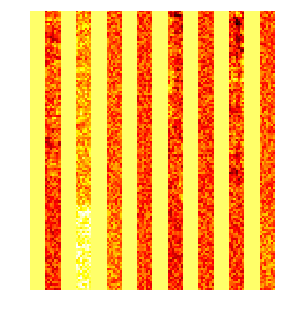

In [264]:
plt.figure(figsize=(5, 5), dpi=500)
W = lasagne.layers.get_all_params(network)[0].get_value()
W[::2, :, :] = 0.2
W = np.hstack(W)
pylab.imshow(W, cmap='hot', interpolation="nearest")
pylab.axis('off')
pylab.show()

# Maps of tracks by SVD and tSNE

Хорошая идея посмотреть, как полученое представление отображается с сохранением относительных расстояний на плоскость. Используйте tSNE или PCA.

Help: https://lts2.epfl.ch/blog/perekres/category/visualizing-hidden-structures-in-datasets-using-deep-learning/

In [102]:
from sklearn.manifold import TSNE

In [103]:
represent = lasagne.layers.get_output(main_network.input_layer)
represent_fun = theano.function([input_X], [represent], allow_input_downcast=True)

In [104]:
f = lambda x: np.array(represent_fun([x])[0])
track_vectors = map(f, X_train) + map(f, X_valid)
track_vectors = np.concatenate(track_vectors, axis=0)

track_labels = np.array(list(y_train) + list(y_valid))

In [105]:
tsne = TSNE()
X_tsne = tsne.fit_transform(track_vectors, y=track_labels)

нарисуйте получившиеся точки

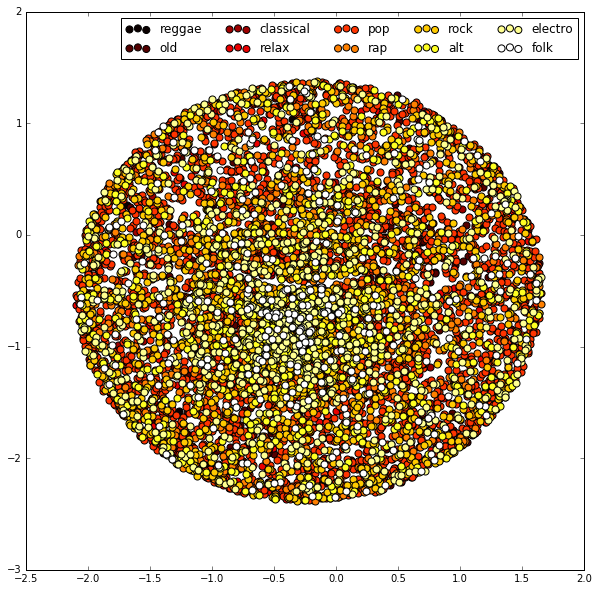

In [106]:
# Посмотрим на разбиение на 10 обобщенных классов
plt.figure(figsize=(10,10), dpi=500)
colors = cm.hot(np.linspace(0, 1, len(genres_comm)))

for idx, gener in genres_comm.items():
    idx_ = np.where(track_labels == idx)
    pylab.scatter(X_tsne[idx_, 0], X_tsne[idx_, 1], c=colors[idx], cmap=cm.hot, label=gener,s=50)

pylab.legend(loc=0, ncol=5)

### Тестовая выборка

In [14]:
X_test = np.load(os.path.join(BP, "spectrograms", "spectrograms7.pcl"))

In [15]:
y_pred = predict(X_test, network, input_X)

In [16]:
res = pd.DataFrame(y_pred, columns=['Category'], index=range(12000,14000))
res.Category = res.Category.apply(lambda x : genres[x])
res.to_csv("cutted.csv", index_label='Id')

In [17]:
my_subm = pd.DataFrame(pd.read_csv("cutted.csv"))

In [18]:
my_subm.head

<bound method DataFrame.head of          Id     Category
0     12000          pop
1     12001          rap
2     12002          pop
3     12003          pop
4     12004          pop
5     12005       rusrap
6     12006         rock
7     12007      rusrock
8     12008         rock
9     12009          pop
10    12010      shanson
11    12011         rock
12    12012        metal
13    12013    classical
14    12014         rock
15    12015      estrada
16    12016          pop
17    12017         rock
18    12018          rnb
19    12019          pop
20    12020        dance
21    12021         jazz
22    12022          pop
23    12023        other
24    12024         rock
25    12025          pop
26    12026      shanson
27    12027          pop
28    12028          pop
29    12029  electronics
...     ...          ...
1970  13970  electronics
1971  13971         rock
1972  13972          pop
1973  13973          pop
1974  13974          rap
1975  13975          pop
1976  13976       

In [294]:
y_knn_pred = clf.predict(X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

In [295]:
res = pd.DataFrame(y_knn_pred, columns=['Category'], index=range(12000,14000))
res.Category = res.Category.apply(lambda x : genres[x])
res.to_csv('knn.csv', index_label='Id')